In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
!ls "/content/drive/MyDrive/train"

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


# Loading the Data 

In [6]:
train_path = "/content/drive/MyDrive/train"
test_path = "/content/drive/MyDrive/test"

(388, 388, 3)

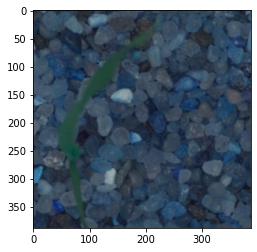

In [ ]:
# checking the size of a random image 
img = cv2.imread("/content/drive/MyDrive/train/Black-grass/0183fdf68.png")
plt.imshow(img)
img.shape

In [7]:
import os
import cv2
import time 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

In [8]:
folder_list = os.listdir(train_path )
scale = 64
train_image_paths = []
train_images = []
train_labels = []
seed= 1

t0=time.time()
for folder in folder_list:
  print(folder)
  path = train_path + '/' + folder + '/'
  path_files = os.listdir(path)
  for image_file in path_files:
    image_path = path + image_file
    train_image_paths.append(image_path)
    train_labels.append(folder)
    train_images.append(cv2.resize(cv2.imread(image_path),(scale,scale)))

t1=time.time()
print("Time taken to load data {} Seconds".format(t1-t0))


Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet
Time taken to load data 2266.646452665329 Seconds


## Data Dimensions

In [9]:
print("Total No of images in data",len(train_images))
print("Length of the Train Lables", len(train_labels))
# converting the data into a numpy array 
train_arry = np.asarray(train_images)
train_label_df = pd.DataFrame(train_labels)

Total No of images in data 4767
Length of the Train Lables 4767


In [10]:
# checking the shape of the data 
print(train_arry.shape)
# we have 4767 images, resized to 64x64 pixels with 3 channels 
print(train_label_df.shape)

(4767, 64, 64, 3)
(4767, 1)


In [11]:
# equal number of labels 
train_arry[1].shape

(64, 64, 3)

## Data Visualization

In [ ]:
a = list(np.arange(0,20,1))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

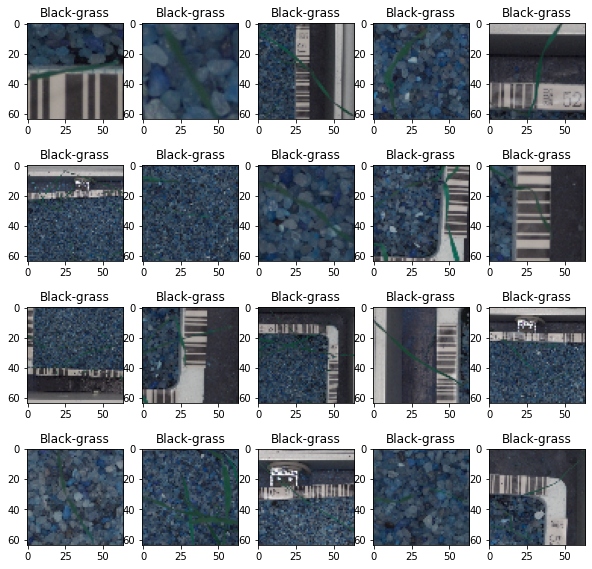

In [ ]:
# checking a few sample images 
plt.figure(figsize=(10,10))
for i in a:
  plt.subplot(4,5,i+1)
  plt.imshow(train_arry[i])
  plt.title(train_labels[i])

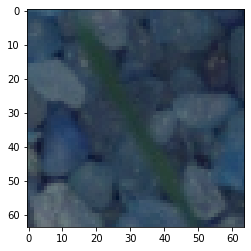

In [ ]:
plt.imshow(train_arry[1])

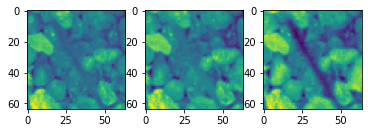

In [ ]:
# visualizing different channels
plt.subplot(1,3,1) 
plt.imshow(train_arry[1][:,:,0])
plt.subplot(1,3,2)
plt.imshow(train_arry[1][:,:,1])
plt.subplot(1,3,3)
plt.imshow(train_arry[1][:,:,2])


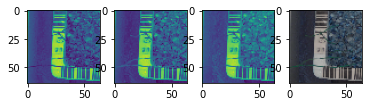

In [ ]:
# visualizing different channels
plt.subplot(1,4,1) 
plt.imshow(train_arry[20][:,:,0])
plt.subplot(1,4,2)
plt.imshow(train_arry[20][:,:,1])
plt.subplot(1,4,3)
plt.imshow(train_arry[20][:,:,2])
plt.subplot(1,4,4)
plt.imshow(train_arry[20])

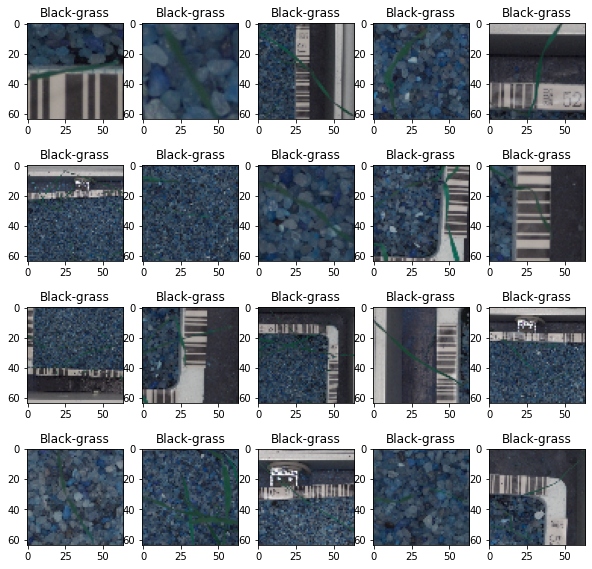

In [ ]:
# visualizing in gray scale 
plt.figure(figsize=(10,10))
for i in a:
  plt.subplot(4,5,i+1)
  plt.imshow(train_arry[i],cmap="gray")
  plt.title(train_labels[i])

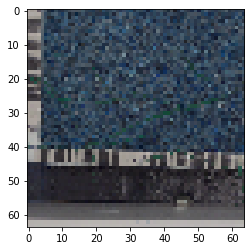

In [ ]:
plt.imshow(train_arry[10],cmap="gray")


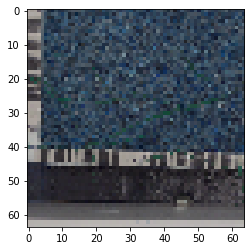

In [ ]:
plt.imshow(train_arry[10])


The Images needs to be trasformed as background is hindering the object of concern "seedling".
# Image Background Removal

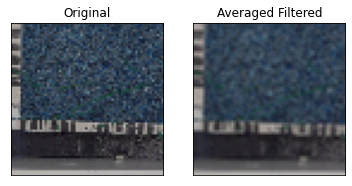

In [12]:
# checking Filtering operation to see the effect 
# 2D Convolutional Filtering
kernel = np.ones ((2,2),np.float32)/4
filter_image = cv2.filter2D(train_arry[10],-1,kernel)
plt.subplot(121)
plt.imshow(train_arry[10])
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(filter_image)
plt.title("Averaged Filtered")
plt.xticks([])
plt.yticks([])
plt.show()

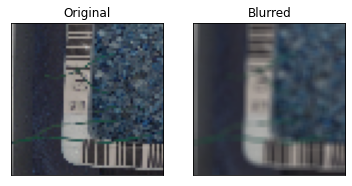

In [13]:
# Image Soomthing / Image Blurring
# trying Smoothing operation to see the effect on the image 
# using Averaging
blur_image = cv2.blur(train_arry[20],(3,3))
plt.subplot(121)
plt.imshow(train_arry[20])
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(blur_image)
plt.title("Blurred")
plt.xticks([])
plt.yticks([])
plt.show()

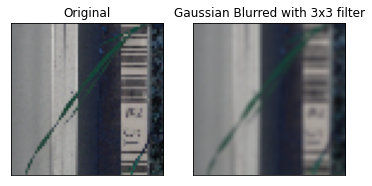

In [14]:
#Gaussian Blurr 
Gblur_image = cv2.GaussianBlur(train_arry[40],(3,3),0)
plt.subplot(121)
plt.imshow(train_arry[40])
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(Gblur_image)
plt.title("Gaussian Blurred with 3x3 filter")
plt.xticks([])
plt.yticks([])
plt.show()

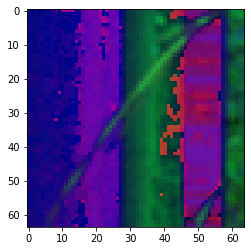

In [15]:
# Convert the above image to HSV image
hsvImg = cv2.cvtColor(Gblur_image, cv2.COLOR_BGR2HSV)  
plt.imshow(hsvImg)

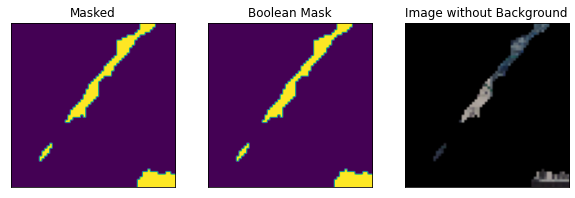

In [16]:
# Create a mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# creating a bool mask
bMask = mask > 0 
# applying the mask by creating and 
clear = np.zeros_like(train_arry[20], np.uint8)
clear[bMask] = train_arry[20][bMask]
# plotting the masked images 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(mask)
plt.title("Masked")
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(bMask)
plt.title("Boolean Mask")
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(clear)
plt.title("Image without Background")
plt.xticks([])
plt.yticks([])
plt.show()

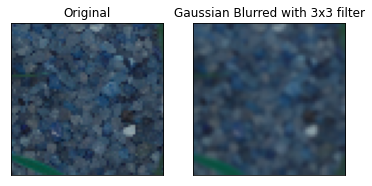

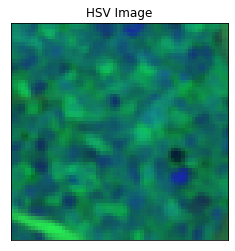

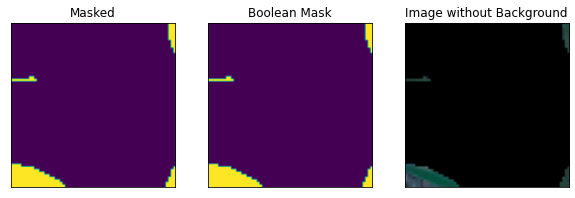

In [18]:
#Gaussian Blurr 
Gblur_image = cv2.GaussianBlur(train_arry[100],(3,3),0)
plt.subplot(121)
plt.imshow(train_arry[100])
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(Gblur_image)
plt.title("Gaussian Blurred with 3x3 filter")
plt.xticks([])
plt.yticks([])
plt.show()
# Convert the above image to HSV image
hsvImg = cv2.cvtColor(Gblur_image, cv2.COLOR_BGR2HSV)  
plt.imshow(hsvImg)
plt.title("HSV Image")
plt.xticks([])
plt.yticks([])
# Create a mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# creating a bool masl
bMask = mask > 0 
# applying the mask by creating and 
clear = np.zeros_like(train_arry[100], np.uint8)
clear[bMask] = train_arry[100][bMask]
# plotting the masked images 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(mask)
plt.title("Masked")
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(bMask)
plt.title("Boolean Mask")
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(clear)
plt.title("Image without Background")
plt.xticks([])
plt.yticks([])
plt.show()

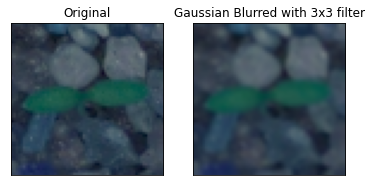

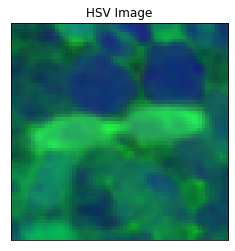

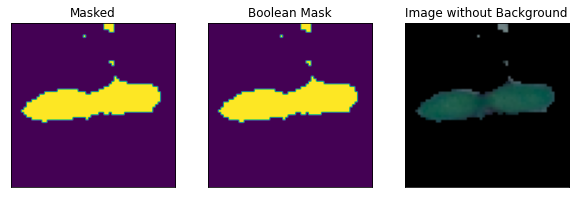

In [19]:
# trying one more random image 
#Gaussian Blurr 
Gblur_image = cv2.GaussianBlur(train_arry[1040],(3,3),0)
plt.subplot(121)
plt.imshow(train_arry[1040])
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(Gblur_image)
plt.title("Gaussian Blurred with 3x3 filter")
plt.xticks([])
plt.yticks([])
plt.show()
# Convert the above image to HSV image
hsvImg = cv2.cvtColor(Gblur_image, cv2.COLOR_BGR2HSV)  
plt.imshow(hsvImg)
plt.title("HSV Image")
plt.xticks([])
plt.yticks([])
# Create a mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# creating a bool masl
bMask = mask > 0 
# applying the mask by creating and 
clear = np.zeros_like(train_arry[1040], np.uint8)
clear[bMask] = train_arry[1040][bMask]
# plotting the masked images 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(mask)
plt.title("Masked")
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(bMask)
plt.title("Boolean Mask")
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(clear)
plt.title("Image without Background")
plt.xticks([])
plt.yticks([])
plt.show()

Above operation to remove image background seems good enoug to proceed with data preparation 
Preparing the data set for training 

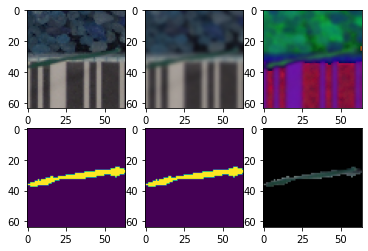

In [20]:
final_train_samples = []
examples = [] 
getEx = True
for img in train_arry:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    final_train_samples.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

final_train_samples = np.asarray(final_train_samples)

In [21]:
final_train_samples.shape

(4767, 64, 64, 3)

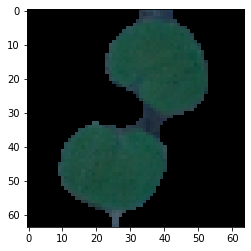

In [22]:
# checking a random image
plt.imshow(final_train_samples[4000])

# Data Preparation 

In [23]:
# Normalizing the training data 
final_train_samples = final_train_samples/255


In [24]:
# checking the above operation 
print(final_train_samples[4000].min())
print(final_train_samples[4000].max())
print(final_train_samples[100].min())
print(final_train_samples[100].max())

0.0
0.41568627450980394
0.0
0.4588235294117647


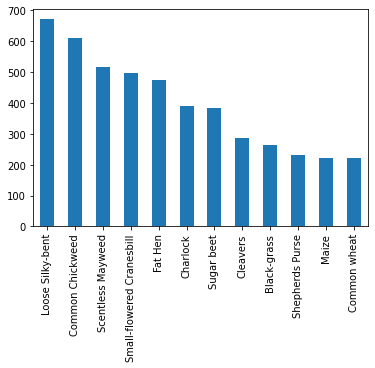

In [25]:
# Plot of label types numbers
train_label_df[0].value_counts().plot(kind='bar')

class imbalance in the data set 

In [26]:
# Encode labels and create classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_train_labels = le.fit_transform(train_label_df)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print("Classes: " + str(le.classes_))

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [28]:
from tensorflow.keras.utils import to_categorical
# Make labels categorical
final_train_labels = to_categorical(encoded_train_labels)
num_clases = final_train_labels.shape[1]
print("Number of classes: " + str(num_clases))


Number of classes: 12


In [29]:
final_train_labels.shape # train labels has a dtype of float 32 
y=pd.DataFrame(final_train_labels)

In [30]:
y.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Splitting the data 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(final_train_samples,final_train_labels,test_size=0.20,random_state=seed,stratify=final_train_labels)

In [32]:
print("Shape of X Train {}".format(x_train.shape))
print("Shape of X Test {}".format(x_test.shape))
print("Shape of Y Train {}".format(y_train.shape))
print("Shape of Y Test {}".format(y_test.shape))


Shape of X Train (3813, 64, 64, 3)
Shape of X Test (954, 64, 64, 3)
Shape of Y Train (3813, 12)
Shape of Y Test (954, 12)


In [33]:
print("Type of X Train {}".format(type(x_train)))
print("Type of X Test {}".format(type(x_test)))
print("Type of Y Train {}".format(type(y_train)))
print("Type of Y Test {}".format(type(y_test)))

Type of X Train <class 'numpy.ndarray'>
Type of X Test <class 'numpy.ndarray'>
Type of Y Train <class 'numpy.ndarray'>
Type of Y Test <class 'numpy.ndarray'>


In [34]:
# Data Augmentation using keras 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(x_train)


In [35]:
print("Shape of X Train {}".format(x_train.shape))

Shape of X Train (3813, 64, 64, 3)


#Supervised Algoritms  
#SVM || DT || KNN
Vanilla CNN + Max Pooling

In [ ]:
# Fitting an SVM on a vanilla CNN model 
# the model has 3 Convolutional layers with 3x3 kernel 
# followed by a max pool layer and dropoutlayer
# 2 Dense Layer 

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
 

In [37]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x_train.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.6))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.8))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(num_clases,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [40]:
model_1 = model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [42]:
# extracting features of from above CNN to train an SVM 
import tensorflow as tf
model_feat = tf.keras.Model(inputs=model_1.input,outputs=model.get_layer("dense_1").output)
feat_train = model_feat.predict(x_train)
feat_test = model_feat.predict(x_test)

In [43]:
# checking the score support vector machines 
from sklearn.svm import SVC
svm = SVC(kernel="rbf")
svm.fit(feat_train,np.argmax(y_train,axis=1))
svm.score(feat_test,np.argmax(y_test,axis=1))

0.33962264150943394

In [44]:
# checking on Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
dt.fit(feat_train,np.argmax(y_train,axis=1))
dt.score(feat_test,np.argmax(y_test,axis=1))


0.24109014675052412

In [45]:
# checking on KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(feat_train,np.argmax(y_train,axis=-1))
knn.score(feat_test,np.argmax(y_test,axis=1))

0.35429769392033544

0.35429769392033544

None of the supervised machine learning alogrithm gave a good score so far 
# Nueral Networks

In [47]:
model_1.fit(x =x_train,y=y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
120/120 [==============================] - 2s 11ms/step - loss: 2.3658 - accuracy: 0.1524 - val_loss: 1.8408 - val_accuracy: 0.4067
Epoch 2/100
120/120 [==============================] - 1s 8ms/step - loss: 1.7117 - accuracy: 0.3877 - val_loss: 1.5418 - val_accuracy: 0.4822
Epoch 3/100
120/120 [==============================] - 1s 8ms/step - loss: 1.4049 - accuracy: 0.4966 - val_loss: 1.4189 - val_accuracy: 0.5597
Epoch 4/100
120/120 [==============================] - 1s 8ms/step - loss: 1.2657 - accuracy: 0.5610 - val_loss: 1.3511 - val_accuracy: 0.5618
Epoch 5/100
120/120 [==============================] - 1s 8ms/step - loss: 1.1916 - accuracy: 0.6007 - val_loss: 1.1842 - val_accuracy: 0.6436
Epoch 6/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0774 - accuracy: 0.6220 - val_loss: 1.1531 - val_accuracy: 0.6688
Epoch 7/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0082 - accuracy: 0.6482 - val_loss: 1.0785 - val_accuracy: 0.666

In [48]:
model_1.evaluate(x_test,y_test)

30/30 [==============================] - 0s 4ms/step - loss: 0.5868 - accuracy: 0.8092


[0.5867716670036316, 0.8092243075370789]

In [49]:
# Multi Layer Perceptron 
model_2 = Sequential()
model_2.add(Flatten(input_shape=(64,64,3)))
model_2.add(Dense(512,activation="relu",kernel_initializer='normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(Dense(64,activation="relu",kernel_initializer='normal'))
model_2.add(BatchNormalization())
model_2.add(Dense(32,activation="relu",kernel_initializer='normal'))
model_2.add(BatchNormalization())
model_2.add(Dense(16,activation="relu",kernel_initializer='normal'))
model_2.add(BatchNormalization())
model_2.add(Dense(12))
model_2.compile(optimizer="adam",loss="CategoricalCrossentropy",metrics=['accuracy'])
model_2.fit(x_train,y_train,epochs=100,batch_size=500,validation_data=(x_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 57ms/step - loss: 7.5539 - accuracy: 0.0940 - val_loss: 7.5093 - val_accuracy: 0.0828
Epoch 2/100
8/8 [==============================] - 0s 28ms/step - loss: 7.5293 - accuracy: 0.0873 - val_loss: 7.4713 - val_accuracy: 0.0964
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 7.0174 - accuracy: 0.0789 - val_loss: 7.3554 - val_accuracy: 0.0985
Epoch 4/100
8/8 [==============================] - 0s 29ms/step - loss: 6.8258 - accuracy: 0.0884 - val_loss: 7.0839 - val_accuracy: 0.1101
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 6.6924 - accuracy: 0.0640 - val_loss: 6.8217 - val_accuracy: 0.0985
Epoch 6/100
8/8 [==============================] - 0s 28ms/step - loss: 6.3613 - accuracy: 0.0576 - val_loss: 6.5661 - val_accuracy: 0.1059
Epoch 7/100
8/8 [==============================] - 0s 29ms/step - loss: 6.7746 - accuracy: 0.0623 - val_loss: 6.9324 - val_accuracy: 0.0996
Epoch 8/100
8/8 [===

# CNN

In [50]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x_train.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.6))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.8))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(num_clases,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [51]:
model_3 = model
t0=time.time()
history_3 = model_3.fit_generator(datagen.flow(x_train, y_train, batch_size=75), epochs=35, validation_data=(x_test, y_test), verbose=2)
t1=time.time()
print(t1-t0,"seconds")

# Final evaluation of the model
scores_3 = model_3.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_3[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
51/51 - 5s - loss: 2.3551 - accuracy: 0.1762 - val_loss: 2.3064 - val_accuracy: 0.2872
Epoch 2/35
51/51 - 4s - loss: 1.9417 - accuracy: 0.3525 - val_loss: 1.9631 - val_accuracy: 0.3281
Epoch 3/35
51/51 - 4s - loss: 1.6427 - accuracy: 0.4133 - val_loss: 1.6676 - val_accuracy: 0.4308
Epoch 4/35
51/51 - 4s - loss: 1.5168 - accuracy: 0.4634 - val_loss: 1.4971 - val_accuracy: 0.4790
Epoch 5/35
51/51 - 4s - loss: 1.3823 - accuracy: 0.5122 - val_loss: 1.3662 - val_accuracy: 0.5556
Epoch 6/35
51/51 - 4s - loss: 1.3309 - accuracy: 0.5256 - val_loss: 1.2935 - val_accuracy: 0.5681
Epoch 7/35
51/51 - 4s - loss: 1.2504 - accuracy: 0.5639 - val_loss: 1.3115 - val_accuracy: 0.5922
Epoch 8/35
51/51 - 4s - loss: 1.2256 - accuracy: 0.5733 - val_loss: 1.2883 - val_accuracy: 0.5860
Epoch 9/35
51/51 - 4s - loss: 1.1472 - accuracy: 0.6037 - val_loss: 1.1303 - val_accuracy: 0.6457
Epoch 10/35
51/51 - 4s - loss: 1.1140 - accuracy: 0.6213 - val_loss: 1.0971 - val_accuracy: 0.6520
Epoch 11/35
51/51 -

In [52]:
print(model_3.evaluate(x_train, y_train))  # Evaluate on train set
print(model_3.evaluate(x_test, y_test))  # Evaluate on test set

120/120 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.8238
[0.544044017791748, 0.8237608075141907]
30/30 [==============================] - 0s 4ms/step - loss: 0.6124 - accuracy: 0.8050
[0.6124358773231506, 0.805031418800354]


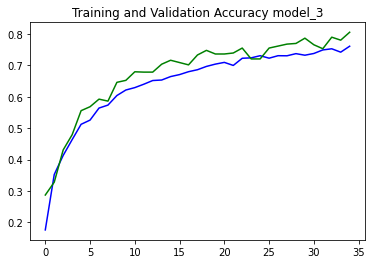

In [53]:
# plot training accuracies
plt.plot(history_3.history['accuracy'],'b') #train acc
plt.plot(history_3.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_3') 
plt.show()

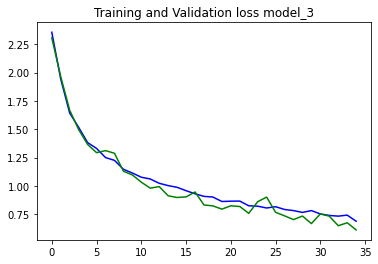

In [54]:
# plot training and validation loss
plt.plot(history_3.history['loss'],'b') #train loss
plt.plot(history_3.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model_3') 
plt.show()

The results of model_3 are a validation accuracy of 80% and an error rate of 20%. The training and validation accuracies and losses converge nicely and there seems to be no overfitting.

Adding one more Convolutional Layer and removing Dropout layer 
Starting with 80 filters this time 

In [55]:
model = Sequential() 
model.add(Conv2D(80, (3, 3), activation='relu', input_shape=(64,64, 3), padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(80, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(160, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(160, (3, 3), activation='relu'))
model.add(Conv2D(240, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dense(num_clases, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4 = model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 80)        2240      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 80)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 80)        57680     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 80)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 160)       115360    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 160)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 160)        

In [56]:
t0=time.time()
history_4 = model_4.fit_generator(datagen.flow(x_train, y_train, batch_size=75), epochs=50, validation_data=(x_test, y_test), verbose=2)
t1=time.time()
print(t1-t0," seconds")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
51/51 - 6s - loss: 2.1135 - accuracy: 0.2589 - val_loss: 1.8209 - val_accuracy: 0.3606
Epoch 2/50
51/51 - 4s - loss: 1.7128 - accuracy: 0.3782 - val_loss: 1.5400 - val_accuracy: 0.4465
Epoch 3/50
51/51 - 4s - loss: 1.5139 - accuracy: 0.4537 - val_loss: 1.4485 - val_accuracy: 0.4780
Epoch 4/50
51/51 - 4s - loss: 1.3427 - accuracy: 0.5235 - val_loss: 1.2778 - val_accuracy: 0.5556
Epoch 5/50
51/51 - 4s - loss: 1.2086 - accuracy: 0.5733 - val_loss: 1.0865 - val_accuracy: 0.6205
Epoch 6/50
51/51 - 4s - loss: 1.1067 - accuracy: 0.6095 - val_loss: 0.9475 - val_accuracy: 0.6866
Epoch 7/50
51/51 - 4s - loss: 0.9598 - accuracy: 0.6743 - val_loss: 0.9240 - val_accuracy: 0.6845
Epoch 8/50
51/51 - 4s - loss: 0.9261 - accuracy: 0.6890 - val_loss: 0.8852 - val_accuracy: 0.7055
Epoch 9/50
51/51 - 4s - loss: 0.8293 - accuracy: 0.7181 - val_loss: 0.7240 - val_accuracy: 0.7631
Epoch 10/50
51/51 - 4s - loss: 0.7505 - accuracy: 0.7422 - val_loss: 0.7765 - val_accuracy: 0.7463
Epoch 11/50
51/51 -

In [57]:
# Final evaluation of the model
scores_4 = model_4.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_4[1]*100))

Baseline Error: 12.16%


In [58]:
print(model_4.evaluate(x_train, y_train))  # Evaluate on train set
print(model_4.evaluate(x_test, y_test))  # Evaluate on test set

120/120 [==============================] - 1s 6ms/step - loss: 0.2246 - accuracy: 0.9171
[0.22463661432266235, 0.9171256422996521]
30/30 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.8784
[0.3173840045928955, 0.8784067034721375]


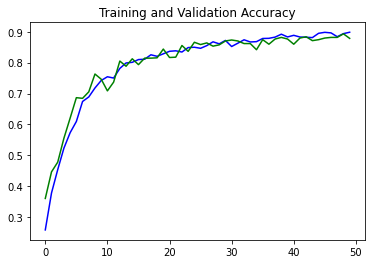

In [59]:
# plot training accuracies
plt.plot(history_4.history['accuracy'],'b') #train acc
plt.plot(history_4.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy') 
plt.show()

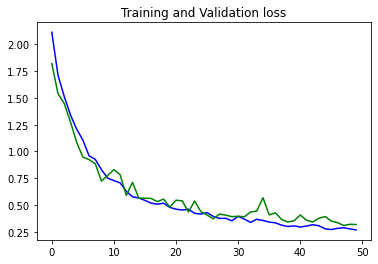

In [60]:
# plot training and validation loss
plt.plot(history_4.history['loss'],'b') #train loss
plt.plot(history_4.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss') 
plt.show()

The results of this  model include a baseline error rate of 12.79% , a validation accuracy of 87% with very little overfitting. The performance has increased after removing dropout layers, from an error rate of 23% and a validation accuracy of 77%.

Building model_5 which consists of 6 conv layers and three fully-connected layers. filters are [64,64, 128,128, 256,256]. Maxpool layers occurred after each pair of conv layers, also using batch normalization and dropout

In [61]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(64,64, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_clases, activation='softmax'))
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_5 = model
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 60, 60, 64)        4864      
_________________________________________________________________
batch_normalization_4 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        102464    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)      

In [62]:
# fit model
t0=time.time()
history_5 = model_5.fit_generator(datagen.flow(x_train,y_train, batch_size=75), epochs=35, validation_data=(x_test, y_test))
t1=time.time()
print(t1-t0," seconds")
# Final evaluation of the model
scores_5 = model_5.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_5[1]*100))
print(model_5.evaluate(x_train, y_train))  # Evaluate on train set
print(model_5.evaluate(x_test, y_test))  # Evaluate on test set

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
51/51 [==============================] - 10s 149ms/step - loss: 3.0068 - accuracy: 0.2161 - val_loss: 7.6027 - val_accuracy: 0.1415
Epoch 2/35
51/51 [==============================] - 5s 106ms/step - loss: 1.9499 - accuracy: 0.3870 - val_loss: 6.5845 - val_accuracy: 0.1457
Epoch 3/35
51/51 [==============================] - 6s 108ms/step - loss: 1.6710 - accuracy: 0.4351 - val_loss: 8.4536 - val_accuracy: 0.0556
Epoch 4/35
51/51 [==============================] - 5s 106ms/step - loss: 1.5395 - accuracy: 0.4793 - val_loss: 10.9967 - val_accuracy: 0.0765
Epoch 5/35
51/51 [==============================] - 5s 106ms/step - loss: 1.3940 - accuracy: 0.5274 - val_loss: 7.7977 - val_accuracy: 0.0755
Epoch 6/35
51/51 [==============================] - 5s 105ms/step - loss: 1.2546 - accuracy: 0.5743 - val_loss: 10.1126 - val_accuracy: 0.0639
Epoch 7/35
51/51 [==============================] - 5s 105ms/step - loss: 1.1101 - accuracy: 0.6239 - val_loss: 7.0400 - val_accuracy: 0.0901
Epo

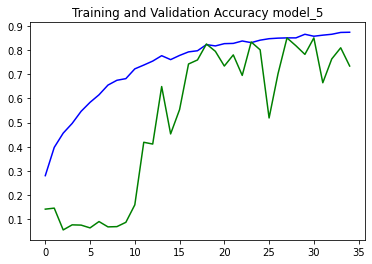

In [63]:
# plotting train and Validation 
plt.plot(history_5.history['accuracy'],'b') #train acc
plt.plot(history_5.history['val_accuracy'],'g') #val acc
plt.title('Training and Validation Accuracy model_5') 
plt.show()

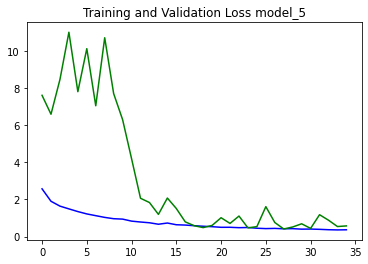

In [69]:
# plot training and validation loss
plt.plot(history_5.history['loss'],'b') #train loss
plt.plot(history_5.history['val_loss'],'g') #val loss
plt.title('Training and Validation Loss model_5') 
plt.show()

 

*   The plots for the model5 by as shown above and demonstrate more overfitting forboth the accuracy and loss scores. The baseline error rate is 15.72 % and the training accuracy is 87%
*  Model_4 seems to be optimally performing so far, using this model as a feature extractor to check the performance of unsupervised learning alogrithms 






# Supervised Alogrithms Part 2

In [ ]:
# extracting features of from above CNN to train an SVM 
import tensorflow as tf
model_feat = tf.keras.Model(inputs=model_4.input,outputs=model.get_layer("dense_13").output)
feat_train = model_feat.predict(x_train)
feat_test = model_feat.predict(x_test)

In [ ]:
# checking the score support vector machines 
from sklearn.svm import SVC
svm = SVC(kernel="rbf")
svm.fit(feat_train,np.argmax(y_train,axis=1))
print("SVM score on Model_4 as feature extractor",svm.score(feat_test,np.argmax(y_test,axis=1)))
# checking on Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
dt.fit(feat_train,np.argmax(y_train,axis=1))
print("DT score on Model_4 as feature extractor",dt.score(feat_test,np.argmax(y_test,axis=1)))
# checking on KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(feat_train,np.argmax(y_train,axis=-1))
print("KNN score on Model_4 as feature extractor",knn.score(feat_test,np.argmax(y_test,axis=1)))

SVM score on Model_4 as feature extractor 0.35429769392033544
DT score on Model_4 as feature extractor 0.24737945492662475
KNN score on Model_4 as feature extractor 0.3867924528301887


Well the experiment seems to fail, as the scores are more worse than previous scenario  ¯\_(ツ)_/¯

# Comparision of Scores 

In [72]:
# comparing the CNN models 
print("Test Accuracy on CNN_1",scores_5[1])
print("Test Accuracy on CNN_2",scores_4[1])
print("Test Accuracy on CNN_3",scores_3[1])

Test Accuracy on CNN_1 0.7337526082992554
Test Accuracy on CNN_2 0.8784067034721375
Test Accuracy on CNN_3 0.805031418800354


In [ ]:
# Training CNN 2 again for better accuracy 


# Predictions 

In [73]:
model = Sequential() 
model.add(Conv2D(80, (3, 3), activation='relu', input_shape=(64,64, 3), padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(80, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(160, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(160, (3, 3), activation='relu'))
model.add(Conv2D(240, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dense(num_clases, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4 = model
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 80)        2240      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 80)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 80)        57680     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 80)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 160)       115360    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 160)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 160)        

In [77]:
# callbacks to save the best model 
from keras.callbacks import ModelCheckpoint
checkpoint_path = "final_training_/my_best_model..hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

In [78]:
%%time
history_4 = model_4.fit_generator(datagen.flow(x_train, y_train, batch_size=75), epochs=100,callbacks=[checkpoint] ,
                                  validation_data=(x_test, y_test), verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
51/51 - 4s - loss: 0.1600 - accuracy: 0.9365 - val_loss: 0.3859 - val_accuracy: 0.8648

Epoch 00001: val_accuracy improved from -inf to 0.86478, saving model to final_training_/my_best_model..hdf5
Epoch 2/100
51/51 - 4s - loss: 0.1696 - accuracy: 0.9336 - val_loss: 0.3388 - val_accuracy: 0.8784

Epoch 00002: val_accuracy improved from 0.86478 to 0.87841, saving model to final_training_/my_best_model..hdf5
Epoch 3/100
51/51 - 4s - loss: 0.1573 - accuracy: 0.9399 - val_loss: 0.3497 - val_accuracy: 0.8920

Epoch 00003: val_accuracy improved from 0.87841 to 0.89203, saving model to final_training_/my_best_model..hdf5
Epoch 4/100
51/51 - 4s - loss: 0.1679 - accuracy: 0.9360 - val_loss: 0.3368 - val_accuracy: 0.8774

Epoch 00004: val_accuracy did not improve from 0.89203
Epoch 5/100
51/51 - 4s - loss: 0.1576 - accuracy: 0.9344 - val_loss: 0.3507 - val_accuracy: 0.8669

Epoch 00005: val_accuracy did not improve from 0.89203
Epoch 6/100
51/51 - 4s - loss: 0.1399 - accuracy: 0.9444 

In [79]:
from tensorflow.keras.models import save_model, load_model
# Load the model with best weights 
best_model = load_model("/content/final_training_/my_best_model..hdf5", compile = True)

In [80]:
best_model.evaluate(x_test,y_test)
# accuracy improved from 87% to 91% 

30/30 [==============================] - 0s 6ms/step - loss: 0.3229 - accuracy: 0.9130


[0.3228839337825775, 0.9129979014396667]

In [82]:
# importing the test images 
pred_image = cv2.imread("/content/drive/MyDrive/PGPAIML/Predict.png")

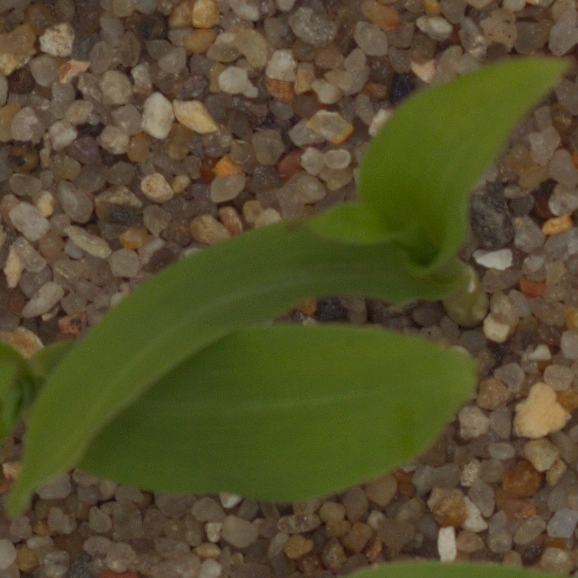

In [87]:
from google.colab.patches import cv2_imshow
cv2_imshow(pred_image)

In [92]:
pred = np.asarray(cv2.resize(cv2.imread(image_path),(64,64))).reshape(-1,64,64,3)
pred.shape

(1, 64, 64, 3)

In [96]:
# predicting the label of the image 
output = best_model.predict(pred)
for i in range(12):
  if output[0,i] == 1:
    print("The output label is", i)

The output label is 7


In [111]:
# checking if the output is predicted correctly or not 
# images with lables 7
indx = []
for i in range(encoded_train_labels.shape[0]):
  if encoded_train_labels[i] == 7 :
    indx.append(i)
#labels.index(2)
print("The index of label 7 images are",indx)

The index of label 7 images are [2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3

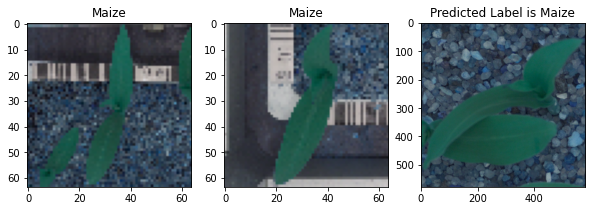

In [120]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(train_images[2919])
plt.title(train_labels[2919])
plt.subplot(132)
plt.imshow(train_images[2920])
plt.title(train_labels[2920])
plt.subplot(133)
plt.imshow(pred_image)
plt.title("Predicted Label is Maize")
plt.show()

# Part2 :  why CNN is best for image classification as compared to Nueral Networks and supervised learning ?



1.   The main advantage of CNN compared to its predecessors is that it automatically detects the important features without any human supervision
2.   Multi Layer Perceptron is different from supervised Learning,A main advantage of MLP is its capability to learn non-linear models. However, the  major disadvantages such as having a non-convex loss function and tuning for the number of hidden layers and neurons, hence performs better than supervised algo's  

